In [107]:
import pandas as pd
from tooltoad.vis import MolTo3DGrid
from tooltoad.chemutils import ac2mol

In [108]:
conversion_factor       =  627.509474
dimer_dft               = -834847.294
HBpin_dft               = -258305.91711374212
H2_dft                  = -737.1088023791428

dimer_xtb               = -97.050557670754 * conversion_factor
HBpin_xtb               = -28.947535986441 * conversion_factor
H2_xtb                  = -0.9826859256890 * conversion_factor

# TS3 without DFT SP before DFT OptTS

In [109]:
import pyarrow.parquet as pp

schema = pp.read_schema("output_files/font_ligs.parquet")
#schema.field_by_name

In [110]:
df_lig = pd.read_parquet(
    "output_files/font_ligs.parquet",
    columns=[
        "ligand_name",
        "xtb-gfn-opt-electronic_energy",
        "orca-wB97X-D3-6-31G**-Freq-electronic_energy",
        "orca-wB97X-D3-6-31G**-Freq-gibbs_energy",
        "orca-wB97X-D3-6-31+G**-NoSym-electronic_energy",
    ],
)

df_ts3 = pd.read_parquet("output_files/font_ts3.parquet")
df_ts3.sort_values(by="ligand_name", inplace=True)

In [111]:
df_lig

,ligand_name,xtb-gfn-opt-electronic_energy,orca-wB97X-D3-6-31G**-Freq-electronic_energy,orca-wB97X-D3-6-31G**-Freq-gibbs_energy,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy
0,1-methylpyrrole,-17.188310,-249.415200,-249.332065,-249.436114
1,"2,3-dihydrothieno[3,4-b][1,4]dioxine",-27.271791,-780.723557,-780.640884,-780.747995
2,furan-2-yloxy(trimethyl)silane,-30.996491,-713.839262,-713.698698,-713.860134
3,trimethyl(pyrrol-1-yl)silane,-26.269264,-618.773168,-618.622349,-618.797128
4,2-tert-butylfuran,-27.314917,-387.198040,-387.046391,-387.217271
5,tri(propan-2-yl)-pyrrol-1-ylsilane,-45.248024,-854.599638,-854.283616,-854.629311
6,2-methoxyfuran,-21.878741,-344.451908,-344.377185,-344.470382
7,2-methylfuran,-17.816401,-269.273972,-269.203328,-269.290542
8,furan,-14.645031,-229.958568,-229.913564,-229.973386
9,1-benzylpyrrole,-32.068578,-480.406346,-480.245737,-480.442777


In [112]:
fregs = []
for i in list(df_ts3["DFT-wB97X-D3-6-31G**-OptTS-vibs"].iloc[0]):
    fregs.append(i.get('frequency'))
fregs

[-268.68,
 32.58,
 40.23,
 51.61,
 53.75,
 69.2,
 83.2,
 92.96,
 134.31,
 154.79,
 161.7,
 191.14,
 192.89,
 220.02,
 253.27,
 254.24,
 266.35,
 286.63,
 291.87,
 299.18,
 308.37,
 317.64,
 327.83,
 350.42,
 362.16,
 373.76,
 384.29,
 406.46,
 416.32,
 445.34,
 472.27,
 483.01,
 499.86,
 520.93,
 535.48,
 574.96,
 581.9,
 593.55,
 604.98,
 625.6,
 646.39,
 660.86,
 679.45,
 684.64,
 728.09,
 731.28,
 766.98,
 777.62,
 791.11,
 814.14,
 819.98,
 831.65,
 840.32,
 879.87,
 885.44,
 899.07,
 917.1,
 935.69,
 940.79,
 942.55,
 956.57,
 977.16,
 991.72,
 995.77,
 999.84,
 1016.27,
 1021.83,
 1023.45,
 1032.62,
 1035.68,
 1073.98,
 1078.93,
 1079.05,
 1092.45,
 1095.02,
 1096.28,
 1106.46,
 1116.06,
 1120.6,
 1147.54,
 1156.02,
 1187.55,
 1190.83,
 1192.84,
 1227.63,
 1235.14,
 1239.4,
 1251.08,
 1268.45,
 1272.25,
 1279.34,
 1296.97,
 1305.16,
 1318.56,
 1329.98,
 1339.54,
 1386.29,
 1403.16,
 1408.85,
 1409.72,
 1416.1,
 1426.09,
 1438.54,
 1440.97,
 1443.56,
 1452.46,
 1472.79,
 1487.75,


In [113]:
df_ts3.drop(columns=["DFT-wB97X-D3-6-31G**-OptTS-vibs"], inplace=True)

In [114]:
df = df_ts3.merge(df_lig, on='ligand_name', how='left', suffixes=('_ts', '_lig'))
energy_cols = [col for col in df.columns if 'energy' in col]
df[energy_cols] = df[energy_cols] * conversion_factor

In [115]:
df[energy_cols]

,energy_uff,xtb-gfnff-opt-electronic_energy,xtb-gfn-electronic_energy,xtb-gfn-opt-electronic_energy_ts,DFT-wB97X-D3-6-31G**-OptTS-electronic_energy,DFT-wB97X-D3-6-31G**-OptTS-gibbs_energy,DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy,xtb-gfn-opt-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-electronic_energy,orca-wB97X-D3-6-31G**-Freq-gibbs_energy,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy
0,524646.534503,-5727.182427,-41207.634753,-41219.011077,-574119.316772,-573849.737938,-574146.017961,-10785.827458,-156510.401246,-156458.233204,-156523.524775
1,532746.640485,-5734.479267,-41209.804608,-41221.126241,-574121.667390,-573851.880199,-574147.695768,-10785.827458,-156510.401246,-156458.233204,-156523.524775
2,588128.537493,-5869.928892,-47537.155083,-47550.508240,-907523.276817,-907243.275606,-907552.760911,-17113.307245,-489911.428368,-489859.550703,-489926.763646
3,528373.966986,-5676.447820,-44147.884238,-44162.748936,-633755.243472,-633491.169224,-633780.632001,-13729.117474,-216146.835578,-216099.945953,-216158.428382
4,524972.554996,-5681.043254,-44147.723991,-44164.094892,-633757.261349,-633492.574118,-633782.752934,-13729.117474,-216146.835578,-216099.945953,-216158.428382
5,538786.748933,-5695.153234,-44149.853317,-44166.622642,-633759.696404,-633495.701430,-633785.764329,-13729.117474,-216146.835578,-216099.945953,-216158.428382
6,599894.691981,-5590.057247,-41600.300963,-41613.676909,-586581.036969,-586319.423607,-586605.092082,-11179.960296,-168971.968668,-168927.638834,-168982.366517
7,534349.977143,-5590.087502,-41599.840288,-41613.105261,-586580.502355,-586318.917847,-586604.723110,-11179.960296,-168971.968668,-168927.638834,-168982.366517
8,536741.207768,-5603.191916,-41602.837502,-41615.625264,-586582.759799,-586321.350833,-586607.345157,-11179.960296,-168971.968668,-168927.638834,-168982.366517
9,552379.525869,-6430.036059,-47560.830335,-47574.007646,-660579.361165,-660266.682159,-660605.247540,-17140.369180,-242970.438266,-242875.277224,-242982.505937


In [116]:
idx = 0

atoms = df_ts3["atoms"].iloc[idx]

coords1 = df_ts3["coords_embedded"].iloc[idx]
coords2 = df_ts3["xtb-gfn-opt-opt_coords"].iloc[idx]
coords3 = df_ts3["DFT-wB97X-D3-6-31G**-OptTS-opt_coords"].iloc[idx]

all_coords = [coords1, coords2, coords3]
all_mols = [ac2mol(atoms, c) for c in all_coords]

MolTo3DGrid(all_mols, legends=['embed', 'xtb-opt', 'dft-opt'])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [117]:
df["lig_G_corr"] = df["orca-wB97X-D3-6-31G**-Freq-gibbs_energy"] - df["orca-wB97X-D3-6-31G**-Freq-electronic_energy"]
df["lig_G"] = df["orca-wB97X-D3-6-31+G**-NoSym-electronic_energy"] + df["lig_G_corr"]

df["G_corr"] = df["DFT-wB97X-D3-6-31G**-OptTS-gibbs_energy"] - df["DFT-wB97X-D3-6-31G**-OptTS-electronic_energy"]
df["G_ts3"] = df["DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy"] + df["G_corr"]


In [118]:
df

,custom_name,ligand_name,rpos,constraint_atoms,cid,smiles,atoms,coords_embedded,energy_uff,xtb-gfnff-opt-electronic_energy,...,DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy,DFT-SP-wB97X-D3-6-31+G**-NoSym-normal_termination,xtb-gfn-opt-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-electronic_energy,orca-wB97X-D3-6-31G**-Freq-gibbs_energy,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy,lig_G_corr,lig_G,G_corr,G_ts3
0,TS3(1-methylpyrrole_rpos(3)),1-methylpyrrole,3,"[10, 17, 39, 41, 40, 45]",17,CN1C=CC=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[2.707882676066167, 3.586704609434462, 2.1725...",524646.534503,-5727.182427,...,-574146.017961,True,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,269.578834,-573876.439127
1,TS3(1-methylpyrrole_rpos(2)),1-methylpyrrole,2,"[10, 17, 39, 41, 40, 44]",34,CN1C=CC=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[2.1420300202208953, -4.242992852313985, -1.8...",532746.640485,-5734.479267,...,-574147.695768,True,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,269.787191,-573877.908577
2,"TS3(2,3-dihydrothieno[3,4-b][1,4]dioxine_rpos(1))","2,3-dihydrothieno[3,4-b][1,4]dioxine",1,"[10, 17, 39, 41, 40, 43]",10,C12=CSC=C1OCCO2,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.9412688863611245, -1.9726628957044428, 3.7...",588128.537493,-5869.928892,...,-907552.760911,True,-17113.307245,-489911.428368,-489859.550703,-489926.763646,51.877665,-489874.885981,280.001211,-907272.759700
3,TS3(2-methoxyfuran_rpos(4)),2-methoxyfuran,4,"[10, 17, 39, 41, 40, 46]",9,COC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.4110892093379432, 2.768644066167089, -4.01...",528373.966986,-5676.447820,...,-633780.632001,True,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,264.074247,-633516.557754
4,TS3(2-methoxyfuran_rpos(3)),2-methoxyfuran,3,"[10, 17, 39, 41, 40, 45]",42,COC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[2.814388234266989, 0.680963073636631, -3.890...",524972.554996,-5681.043254,...,-633782.752934,True,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,264.687231,-633518.065703
5,TS3(2-methoxyfuran_rpos(5)),2-methoxyfuran,5,"[10, 17, 39, 41, 40, 47]",17,COC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[3.125313391209628, 3.646513800762518, 1.3048...",538786.748933,-5695.153234,...,-633785.764329,True,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,263.994974,-633521.769355
6,TS3(2-methylfuran_rpos(2)),2-methylfuran,2,"[10, 17, 39, 41, 40, 44]",9,CC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[2.3622943482539913, 2.446357486625532, -3.78...",599894.691981,-5590.057247,...,-586605.092082,True,-11179.960296,-168971.968668,-168927.638834,-168982.366517,44.329834,-168938.036684,261.613362,-586343.478720
7,TS3(2-methylfuran_rpos(3)),2-methylfuran,3,"[10, 17, 39, 41, 40, 45]",32,CC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.542707540418343, -4.011987702598525, 2.519...",534349.977143,-5590.087502,...,-586604.723110,True,-11179.960296,-168971.968668,-168927.638834,-168982.366517,44.329834,-168938.036684,261.584508,-586343.138602
8,TS3(2-methylfuran_rpos(4)),2-methylfuran,4,"[10, 17, 39, 41, 40, 46]",5,CC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.936391325632466, -3.801659154534158, -2.67...",536741.207768,-5603.191916,...,-586607.345157,True,-11179.960296,-168971.968668,-168927.638834,-168982.366517,44.329834,-168938.036684,261.408967,-586345.936190
9,TS3(2-tert-butylfuran_rpos(4)),2-tert-butylfuran,4,"[10, 17, 39, 41, 40, 46]",15,CC(C1=CC=CO1)(C)C,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[-0.5354644056900401, -4.666736259927921, -1....",552379.525869,-6430.036059,...,-660605.247540,True,-17140.369180,-242970.438266,-242875.277224,-242982.505937,95.161042,-242887.344895,312.679007

In [119]:
df["dG"] = (2 * (df["G_ts3"] - df["lig_G"]) - dimer_dft) / 2
df

,custom_name,ligand_name,rpos,constraint_atoms,cid,smiles,atoms,coords_embedded,energy_uff,xtb-gfnff-opt-electronic_energy,...,DFT-SP-wB97X-D3-6-31+G**-NoSym-normal_termination,xtb-gfn-opt-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-electronic_energy,orca-wB97X-D3-6-31G**-Freq-gibbs_energy,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy,lig_G_corr,lig_G,G_corr,G_ts3,dG
0,TS3(1-methylpyrrole_rpos(3)),1-methylpyrrole,3,"[10, 17, 39, 41, 40, 45]",17,CN1C=CC=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[2.707882676066167, 3.586704609434462, 2.1725...",524646.534503,-5727.182427,...,True,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,269.578834,-573876.439127,18.564606
1,TS3(1-methylpyrrole_rpos(2)),1-methylpyrrole,2,"[10, 17, 39, 41, 40, 44]",34,CN1C=CC=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[2.1420300202208953, -4.242992852313985, -1.8...",532746.640485,-5734.479267,...,True,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,269.787191,-573877.908577,17.095156
2,"TS3(2,3-dihydrothieno[3,4-b][1,4]dioxine_rpos(1))","2,3-dihydrothieno[3,4-b][1,4]dioxine",1,"[10, 17, 39, 41, 40, 43]",10,C12=CSC=C1OCCO2,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.9412688863611245, -1.9726628957044428, 3.7...",588128.537493,-5869.928892,...,True,-17113.307245,-489911.428368,-489859.550703,-489926.763646,51.877665,-489874.885981,280.001211,-907272.759700,25.773281
3,TS3(2-methoxyfuran_rpos(4)),2-methoxyfuran,4,"[10, 17, 39, 41, 40, 46]",9,COC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.4110892093379432, 2.768644066167089, -4.01...",528373.966986,-5676.447820,...,True,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,264.074247,-633516.557754,18.628004
4,TS3(2-methoxyfuran_rpos(3)),2-methoxyfuran,3,"[10, 17, 39, 41, 40, 45]",42,COC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[2.814388234266989, 0.680963073636631, -3.890...",524972.554996,-5681.043254,...,True,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,264.687231,-633518.065703,17.120055
5,TS3(2-methoxyfuran_rpos(5)),2-methoxyfuran,5,"[10, 17, 39, 41, 40, 47]",17,COC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[3.125313391209628, 3.646513800762518, 1.3048...",538786.748933,-5695.153234,...,True,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,263.994974,-633521.769355,13.416403
6,TS3(2-methylfuran_rpos(2)),2-methylfuran,2,"[10, 17, 39, 41, 40, 44]",9,CC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[2.3622943482539913, 2.446357486625532, -3.78...",599894.691981,-5590.057247,...,True,-11179.960296,-168971.968668,-168927.638834,-168982.366517,44.329834,-168938.036684,261.613362,-586343.478720,18.204964
7,TS3(2-methylfuran_rpos(3)),2-methylfuran,3,"[10, 17, 39, 41, 40, 45]",32,CC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.542707540418343, -4.011987702598525, 2.519...",534349.977143,-5590.087502,...,True,-11179.960296,-168971.968668,-168927.638834,-168982.366517,44.329834,-168938.036684,261.584508,-586343.138602,18.545082
8,TS3(2-methylfuran_rpos(4)),2-methylfuran,4,"[10, 17, 39, 41, 40, 46]",5,CC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.936391325632466, -3.801659154534158, -2.67...",536741.207768,-5603.191916,...,True,-11179.960296,-168971.968668,-168927.638834,-168982.366517,44.329834,-168938.036684,261.408967,-586345.936190,15.747493
9,TS3(2-tert-butylfuran_rpos(4)),2-tert-butylfuran,4,"[10, 17, 39, 41, 40, 46]",15,CC(C1=CC=CO1)(C)C,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[-0.5354644056900401, -4.666736259927921, -1....",552379.525869,-6430.036059,...,True,-17140.369180,-242970.438266,-242875.277224,-242982.505937,95.161042,-242887.344895,312.679007,-660292.568533,18.423362


In [123]:
df["dE"] = (2 * (df["xtb-gfn-opt-electronic_energy_ts"] - df["xtb-gfn-opt-electronic_energy_lig"]) - dimer_xtb) / 2

In [124]:
df

,custom_name,ligand_name,rpos,constraint_atoms,cid,smiles,atoms,coords_embedded,energy_uff,xtb-gfnff-opt-electronic_energy,...,xtb-gfn-opt-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-electronic_energy,orca-wB97X-D3-6-31G**-Freq-gibbs_energy,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy,lig_G_corr,lig_G,G_corr,G_ts3,dG,dE
0,TS3(1-methylpyrrole_rpos(3)),1-methylpyrrole,3,"[10, 17, 39, 41, 40, 45]",17,CN1C=CC=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[2.707882676066167, 3.586704609434462, 2.1725...",524646.534503,-5727.182427,...,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,269.578834,-573876.439127,18.564606,16.888579
1,TS3(1-methylpyrrole_rpos(2)),1-methylpyrrole,2,"[10, 17, 39, 41, 40, 44]",34,CN1C=CC=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[2.1420300202208953, -4.242992852313985, -1.8...",532746.640485,-5734.479267,...,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,269.787191,-573877.908577,17.095156,14.773415
2,"TS3(2,3-dihydrothieno[3,4-b][1,4]dioxine_rpos(1))","2,3-dihydrothieno[3,4-b][1,4]dioxine",1,"[10, 17, 39, 41, 40, 43]",10,C12=CSC=C1OCCO2,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.9412688863611245, -1.9726628957044428, 3.7...",588128.537493,-5869.928892,...,-17113.307245,-489911.428368,-489859.550703,-489926.763646,51.877665,-489874.885981,280.001211,-907272.759700,25.773281,12.871204
3,TS3(2-methoxyfuran_rpos(4)),2-methoxyfuran,4,"[10, 17, 39, 41, 40, 46]",9,COC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.4110892093379432, 2.768644066167089, -4.01...",528373.966986,-5676.447820,...,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,264.074247,-633516.557754,18.628004,16.440736
4,TS3(2-methoxyfuran_rpos(3)),2-methoxyfuran,3,"[10, 17, 39, 41, 40, 45]",42,COC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[2.814388234266989, 0.680963073636631, -3.890...",524972.554996,-5681.043254,...,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,264.687231,-633518.065703,17.120055,15.094780
5,TS3(2-methoxyfuran_rpos(5)),2-methoxyfuran,5,"[10, 17, 39, 41, 40, 47]",17,COC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[3.125313391209628, 3.646513800762518, 1.3048...",538786.748933,-5695.153234,...,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,263.994974,-633521.769355,13.416403,12.567029
6,TS3(2-methylfuran_rpos(2)),2-methylfuran,2,"[10, 17, 39, 41, 40, 44]",9,CC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[2.3622943482539913, 2.446357486625532, -3.78...",599894.691981,-5590.057247,...,-11179.960296,-168971.968668,-168927.638834,-168982.366517,44.329834,-168938.036684,261.613362,-586343.478720,18.204964,16.355584
7,TS3(2-methylfuran_rpos(3)),2-methylfuran,3,"[10, 17, 39, 41, 40, 45]",32,CC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.542707540418343, -4.011987702598525, 2.519...",534349.977143,-5590.087502,...,-11179.960296,-168971.968668,-168927.638834,-168982.366517,44.329834,-168938.036684,261.584508,-586343.138602,18.545082,16.927233
8,TS3(2-methylfuran_rpos(4)),2-methylfuran,4,"[10, 17, 39, 41, 40, 46]",5,CC1=CC=CO1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.936391325632466, -3.801659154534158, -2.67...",536741.207768,-5603.191916,...,-11179.960296,-168971.968668,-168927.638834,-168982.366517,44.329834,-168938.036684,261.408967,-586345.936190,15.747493,14.407229
9,TS3(2-tert-butylfuran_rpos(4)),2-tert-butylfuran,4,"[10, 17, 39, 41, 40, 46]",15,CC(C1=CC=CO1)(C)C,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[-0.5354644056900401, -4.666736259927921, -1....",552379.525869,-6430.036059,...,-17140.369180,-242970.438266,-242875.277224,-242982.505937,95.161042,-242887.344895,312.679007,-660292.568533,18.423362,16.433732


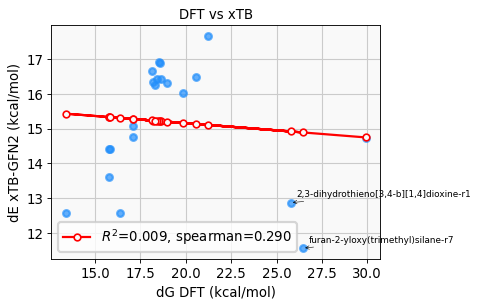

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, spearmanr

method = 'spearman'  # or 'spearman'

df1 = df[['ligand_name','rpos','dG']].copy()
df2 = df[['ligand_name','rpos','dE']].copy()
merged = pd.merge(df1, df2, on=['ligand_name','rpos'], how='inner')
#merged = merged.drop(merged["dG"].nlargest(2).index)

x = merged['dG']
y = merged['dE']
slope, intercept, r_val, p_val, stderr = linregress(x, y)
y_fit = slope * x + intercept
rho, _ = spearmanr(x, y)

if method == 'pearson':
    merged['score'] = (y - y_fit).abs()
elif method == 'spearman':
    merged['rank_dG'] = merged['dG'].rank()
    merged['rank_dE'] = merged['dE'].rank()
    merged['score'] = (merged['rank_dE'] - merged['rank_dG']).abs()

outliers = merged.nlargest(2, 'score')

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7)
plt.plot(x, y_fit, color='red', label=f"$R^2$={r_val**2:.3f}, spearman={rho:.3f}")

for _, row in outliers.iterrows():
    lbl = f"{row['ligand_name']}-r{int(row['rpos'])}"
    plt.annotate(lbl, (row['dG'], row['dE']),
                 textcoords="offset points", xytext=(5,5),
                 ha='left', fontsize=8, arrowprops=dict(arrowstyle="->", lw=0.5))

plt.xlabel("dG DFT (kcal/mol)")
plt.ylabel("dE xTB-GFN2 (kcal/mol)")
plt.title("DFT vs xTB")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# TS3 with DFT SP before DFT OptTS